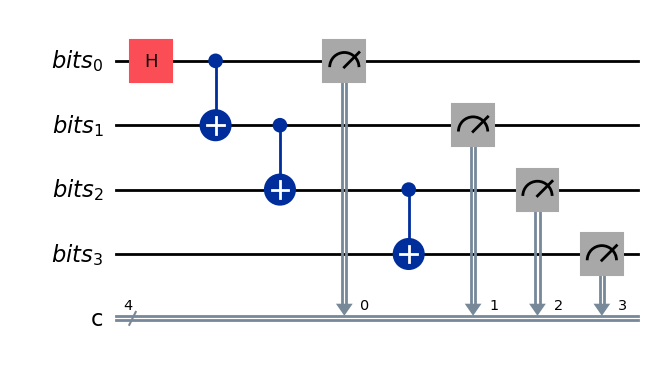

In [20]:
from qiskit.circuit import QuantumCircuit
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2, Fake5QV1
backend = GenericBackendV2(4)

new_cat=QuantumCircuit.from_qasm_file('cat_state_n4.qasm')
new_cat.draw("mpl")

In [24]:
new_cat.depth()

5

In [25]:
new_cat.count_ops()

OrderedDict([('measure', 4), ('cx', 3), ('h', 1)])

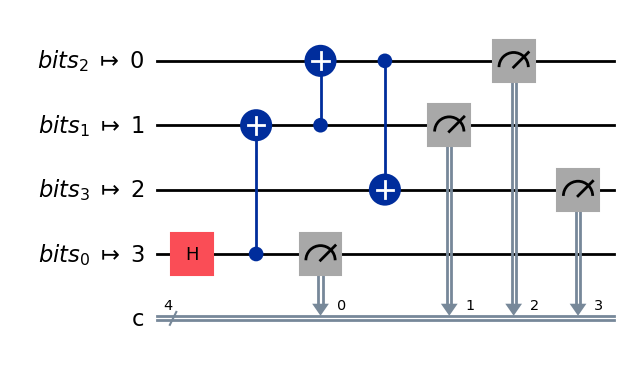

In [30]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.providers.fake_provider import GenericBackendV2, Fake5QV1
backend1 = GenericBackendV2(num_qubits=4,coupling_map=[[0, 1], [0, 2], [1, 0], [1, 3], [2, 0], [2, 3], [3, 1], [3, 2]])
#'qiskit.transpiler.passes.RemoveFinalMeasurements

trans_cat = transpile(new_cat, backend=backend1, optimization_level=3, basis_gates=['h','cx'])
#trans_qiskit=trans_qiskit1.decompose()
trans_cat.draw("mpl")

In [12]:
trans_cat.depth()

5

In [13]:
trans_cat.count_ops()

OrderedDict([('measure', 4), ('cx', 3), ('h', 1)])

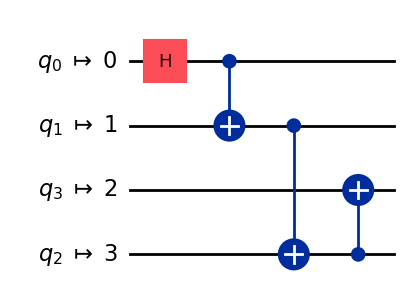

In [14]:
from mqt import qmap

arch = qmap.Architecture(
    4,
    {
        (0, 1),
        (0, 2),
        (1, 0),
        (1, 3),
        (2, 0),
        (2, 3),
        (3, 1),
        (3, 2),
    },
)

a_algo1, res = qmap.compile(new_cat, arch, method="heuristic", post_mapping_optimizations=True, add_measurements_to_mapped_circuit=True, initial_layout="dynamic")
#a_algo1 = transpile(a_algo, backend1, basis_gates=['rz', 'sx', 'cx'])

#a_algo.decompose().draw(output='mpl')
#a_algo=a_algo1.decompose()
a_algo1.draw(output="mpl")

In [15]:
a_algo1.depth()

4

In [16]:
a_algo1.count_ops()

OrderedDict([('cx', 3), ('h', 1)])

In [17]:
print (" Additional SWAPs : %d" % res . output . swaps )
print (" Runtime : %f" % res . time )

 Additional SWAPs : 0
 Runtime : 0.000081
